In [87]:
import evolml
import evolml.models
import metaheuristic_designer as mhd
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

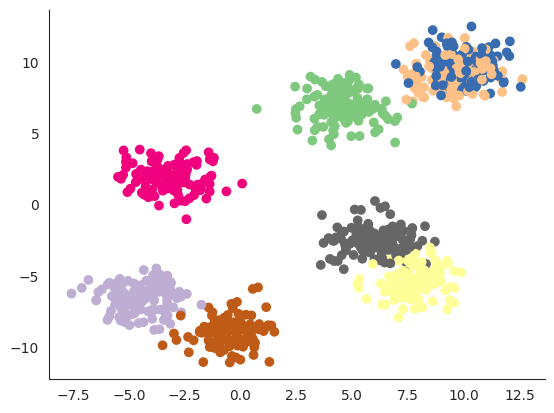

In [88]:
k = 8
X, y = make_blobs(n_samples=1000, n_features=2, centers=k)
plt.scatter(X[:,0], X[:,1], c=y, cmap="Accent")
sns.despine()
plt.show()

In [90]:
cluster_alg = evolml.models.GeneticKMedioids(k=k, pcross=0.9, pmut=0.1, pop_size=100, stop_cond="time_limit", time_limit=60, verbose=True)
cluster_alg.fit(X)

Initializing optimization of some function using GA
---------------------------------------------------

Optimizing some function using GA:
	Real time Spent: 1.08 s
	CPU time Spent:  1.08 s
	Generation: 0
	Best fitness: 0.583599718031619
	Evaluations of fitness: 100

	diversity: 2.56e+02

Optimizing some function using GA:
	Real time Spent: 2.17 s
	CPU time Spent:  2.17 s
	Generation: 1
	Best fitness: 0.6107334284001756
	Evaluations of fitness: 200

	diversity: 2.58e+02

Optimizing some function using GA:
	Real time Spent: 3.26 s
	CPU time Spent:  3.26 s
	Generation: 2
	Best fitness: 0.6228678846289265
	Evaluations of fitness: 300

	diversity: 2.53e+02

Optimizing some function using GA:
	Real time Spent: 4.37 s
	CPU time Spent:  4.37 s
	Generation: 3
	Best fitness: 0.6228678846289265
	Evaluations of fitness: 400

	diversity: 2.59e+02

Optimizing some function using GA:
	Real time Spent: 5.4 s
	CPU time Spent:  5.4 s
	Generation: 4
	Best fitness: 0.6248202714568152
	Evaluations of fitn

GeneticKMedioids(k=8)

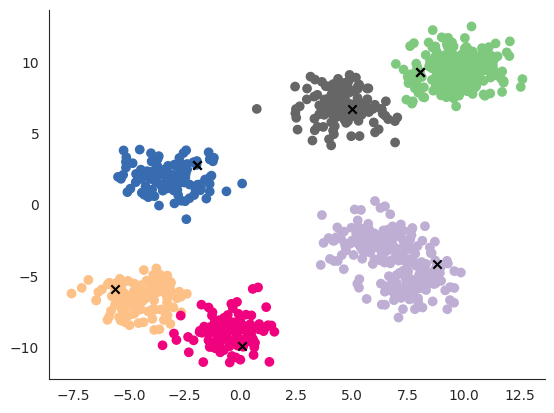

In [91]:
labels = cluster_alg.predict(X) 
plt.scatter(X[:,0], X[:,1], c=labels, cmap="Accent")
plt.scatter(cluster_alg.medioids[:, 0], cluster_alg.medioids[:, 1], marker="x", color="black")
sns.despine()
plt.show()

### comparing real labels with k-medioids labels

In [95]:
pairs = []
pairs_idx = []
centroids = np.asarray([X[y==i].mean(axis=0) for i in range(k)])
medioids = cluster_alg.medioids
medioids_aux = medioids.copy()
for idx, val in enumerate(centroids):
    nearest = np.argmin(((val - medioids_aux)**2).sum(axis=1))
    chosen_m = medioids_aux[nearest]
    medioids_aux = np.delete(medioids_aux, nearest, axis=0)
    pairs += [(val, chosen_m)]
pairs
label_map = dict([(np.where(med[0] == medioids[:,0])[0][0], idx) for idx, (cent, med) in enumerate(pairs)])
true_labels = np.asarray([label_map[i] for i in labels])
print(y)
print(true_labels)

accuracy_score(y, true_labels)

[1 2 4 1 4 6 3 5 4 2 7 0 5 2 3 5 2 5 2 5 5 2 3 2 4 6 0 4 5 7 0 2 1 0 7 4 4
 2 0 5 0 2 3 0 0 5 5 6 4 6 3 3 3 0 3 5 1 1 3 2 5 0 6 7 5 0 6 2 3 3 1 4 6 4
 5 2 1 4 4 1 0 7 0 7 2 7 3 2 4 0 5 7 7 1 4 1 0 4 3 1 1 4 5 0 2 3 0 1 6 2 1
 0 2 3 0 3 7 2 5 1 5 1 3 7 5 0 2 1 7 7 1 5 7 6 5 6 5 1 4 5 1 7 6 2 0 7 0 2
 4 7 0 1 7 2 1 6 2 0 0 7 3 1 3 4 7 5 5 6 4 2 1 7 0 1 0 1 3 1 2 3 2 0 2 2 5
 2 3 1 1 6 4 7 7 2 2 5 5 0 0 0 7 7 0 0 0 1 4 0 1 5 1 5 7 6 6 6 4 3 1 4 2 1
 2 1 6 4 5 6 2 4 5 6 3 7 3 3 3 7 3 5 6 0 7 7 3 2 4 2 1 6 2 2 6 2 3 5 7 3 7
 3 7 1 2 0 1 3 1 2 3 4 2 2 5 4 2 6 2 3 1 5 6 2 1 4 4 5 2 1 1 2 2 6 7 2 4 1
 0 2 5 1 7 6 3 7 5 5 0 2 1 4 7 2 2 0 5 7 3 7 1 7 0 7 2 3 4 3 1 6 5 6 1 7 0
 1 4 6 4 5 4 2 7 2 4 2 4 4 6 4 7 4 5 1 1 7 1 0 7 5 5 1 5 4 6 4 1 5 3 4 2 3
 0 2 6 7 2 4 0 2 1 3 0 7 7 4 4 3 3 4 5 2 4 7 6 3 1 1 6 7 6 4 5 1 2 6 4 4 3
 5 0 0 3 0 2 2 5 1 5 2 5 4 4 0 3 4 3 1 6 1 7 1 7 6 2 4 3 2 0 3 5 6 1 4 2 5
 1 7 6 7 1 3 3 0 3 2 0 7 0 4 6 4 2 0 4 0 3 5 3 5 1 0 0 1 3 7 1 2 1 7 6 0 2
 2 0 4 2 1 4 3 6 7 1 3 7 

0.623